In [1]:
import numpy as np
import pandas as pd
import nltk #natural languafe tool kit 
from nltk.corpus import stopwords
import string  

In [2]:
df = pd.read_csv('/content/spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.shape

(5157, 2)

In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
dummy= pd.get_dummies(df['Category'])

In [10]:
dummy.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
df2= pd.concat((dummy, df), axis=1)

In [12]:
df2.head()

,ham,spam,Category,Message
0,1,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,0,ham,Ok lar... Joking wif u oni...
2,0,1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,0,ham,U dun say so early hor... U c already then say...
4,1,0,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df2= df2.drop(['Category'], axis=1)

In [14]:
df2= df2.drop(['ham'], axis=1)

In [15]:
df2.head()

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df2= df2.rename(columns={'spam':'category'})

In [17]:
# Download the stopwords package 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def proccess_text(text):
  #remove punctuation
  #remove stopwords
  #return a list of clean text words

  #1
  nopunc= [char for char in text if char not in string.punctuation]
  nopunc= ''.join(nopunc)

  #2
  clean_words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words


In [19]:
#show the tokinization(a list of tokens also called lemmas)
df2['Message'].head().apply(proccess_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [20]:
#convert a collection of text into a matrix of tokens 
from sklearn.feature_extraction.text import CountVectorizer
# bow -> bag of words 
messages_bow = CountVectorizer(analyzer=proccess_text).fit_transform(df2['Message'])

In [21]:
#split data into 70% for training & 30% for testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df2['category'], test_size=0.30, random_state= 0)

In [22]:
df2.columns

Index(['category', 'Message'], dtype='object')

In [23]:
messages_bow.shape

(5157, 11422)

In [24]:
from nltk.corpus.reader.nkjp import XML_Tool
#create and train the naive bayes classifier 
from sklearn.naive_bayes import MultinomialNB
classifier= MultinomialNB().fit(X_train, y_train)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
preds= classifier.predict(X_test)

In [26]:
print(y_test.values)
print(preds)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [27]:
print(classification_report(y_test, preds))
print('Accuracy:', accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1351
           1       0.80      0.92      0.86       197

    accuracy                           0.96      1548
   macro avg       0.90      0.95      0.92      1548
weighted avg       0.96      0.96      0.96      1548

Accuracy: 0.9612403100775194


In [28]:
cf_matrix = confusion_matrix(y_test, preds)

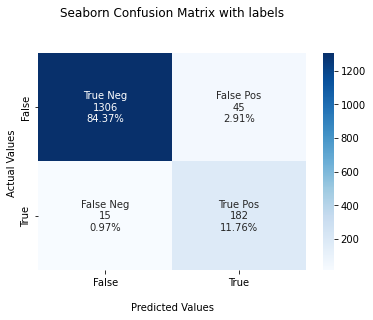

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt 
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()